<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>

# Visualización de la información: Tarea #2

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra </em><br>
    
**Nombre Estudiante**:  
- Cristhian Solís

### Objetivo:
Reproducir lo más fielmente dos (2) visualizaciones distintas provistas por el profesor, la idea aquí es crear una visualización lo más cercana a las dadas por el profesor en cuanto a anotaciones, colores, espacios, fuentes, textos, tipo de grafico, etcétera.

### Criterios de evaluación
- Título, subtitulo y notas adicionales de la visualización
- Ejes X e Y, labels, ticks, rangos, tipo de escala (lineal, logarítmica)
- Grilla y leyenda
- Gráfico y/o representación de datos (si es gráfico de líneas, de barras, de calor, etcétera)
- Colores, mapa de colores y escalas de colores, donde además se incluyen el rango  y los labels de la escala
- Anotaciones más cualquiero elemento que resalte algún aspecto del gráfico (rectángulos, círculos, líneas)

### Desarrollo

En los siguientes bloques de codigos se implementan la replica  de visualizaciones entregadas

In [60]:
# Importación de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import Image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from matplotlib import lines
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
from matplotlib.patheffects import withStroke
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext
from skimage import io
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib.lines as mlines


**Visualización N_1**

In [61]:
# Carga del dataframe N_1
try:
    df = pd.read_csv(r'.\data\01-behavioural-finance.csv', index_col=0)
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


In [62]:
# Revisión inicial
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Aus to UK
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aus     14 non-null     float64
 1   Bel     15 non-null     float64
 2   Den     15 non-null     float64
 3   Fin     14 non-null     float64
 4   Fra     15 non-null     float64
 5   Ger     15 non-null     float64
 6   Gre     15 non-null     float64
 7   Ire     15 non-null     float64
 8   Ita     15 non-null     float64
 9   NL      15 non-null     float64
 10  Nor     14 non-null     float64
 11  Por     15 non-null     float64
 12  Spa     15 non-null     float64
 13  Swe     14 non-null     float64
 14  UK      15 non-null     float64
dtypes: float64(15)
memory usage: 1.9+ KB


,Aus,Bel,Den,Fin,Fra,Ger,Gre,Ire,Ita,NL,Nor,Por,Spa,Swe,UK
Origin of trust,,,,,,,,,,,,,,,
Aus,0.38,-0.00,-0.06,-0.04,-0.05,0.10,-0.02,-0.06,-0.01,-0.04,-0.04,-0.03,-0.04,-0.01,-0.08
Bel,-0.03,0.12,-0.02,-0.04,0.02,-0.03,-0.00,-0.01,0.02,-0.03,-0.06,0.01,-0.01,-0.04,-0.04
Den,0.05,-0.04,0.31,0.04,-0.08,-0.03,-0.05,0.02,-0.04,0.10,0.22,-0.04,-0.06,0.15,0.05
Fin,0.05,-0.04,0.06,0.36,-0.08,-0.07,-0.10,-0.05,-0.12,-0.03,0.16,-0.12,-0.14,0.09,0.03
Fra,-0.07,0.04,-0.01,-0.03,0.25,0.06,0.01,0.01,0.05,-0.02,-0.03,0.04,0.04,-0.01,-0.05


In [63]:
# Manejo del dataframe
nuevo_orden = ['Fin', 'Nor', 'Swe', 'Den', 'UK', 'Ire', 'NL', 'Ger', 'Bel', 'Aus', 'Fra', 'Ita', 'Spa', 'Por', 'Gre']
nuevo_orden_inverso = nuevo_orden[::-1]
df_reordenado = df.reindex(nuevo_orden,columns=nuevo_orden_inverso + [columna for columna in df.columns if columna not in nuevo_orden])
df_reordenado = df_reordenado * 100
df_reordenado.head()

,Gre,Por,Spa,Ita,Fra,Aus,Bel,Ger,NL,Ire,UK,Den,Swe,Nor,Fin
Origin of trust,,,,,,,,,,,,,,,
Fin,-10.0,-12.0,-14.0,-12.0,-8.0,5.0,-4.0,-7.0,-3.0,-5.0,3.0,6.0,9.0,16.0,36.0
Nor,-8.0,-8.0,-10.0,-6.0,-5.0,NaN,1.0,-4.0,5.0,2.0,10.0,24.0,NaN,NaN,NaN
Swe,-8.0,-7.0,-12.0,-8.0,-11.0,8.0,-6.0,-8.0,-3.0,2.0,7.0,12.0,10.0,15.0,8.0
Den,-5.0,-4.0,-6.0,-4.0,-8.0,5.0,-4.0,-3.0,10.0,2.0,5.0,31.0,15.0,22.0,4.0
UK,-1.0,1.0,-1.0,3.0,-8.0,-5.0,-2.0,-11.0,4.0,3.0,28.0,2.0,-3.0,-1.0,-3.0


In [64]:
# Definición de paleta de colores
mask = df_reordenado.isna()
my_gradient=LinearSegmentedColormap.from_list('my_gradient', (
    (0.000, (0.922, 0.455, 0.349)),
    (0.105, (0.969, 0.553, 0.443)),
    (0.225, (0.937, 0.796, 0.769)),
    (0.295, (1.000, 1.000, 1.000)),
    (0.305, (1.000, 1.000, 1.000)),
    (0.566, (0.141, 0.875, 0.945)),
    (0.950, (0.290, 0.416, 0.757)),
    (1.000, (0.188, 0.255, 0.435))))
my_gradient.set_bad(color=(0.675, 0.690, 0.733))

In [65]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, -1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0],0, df.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

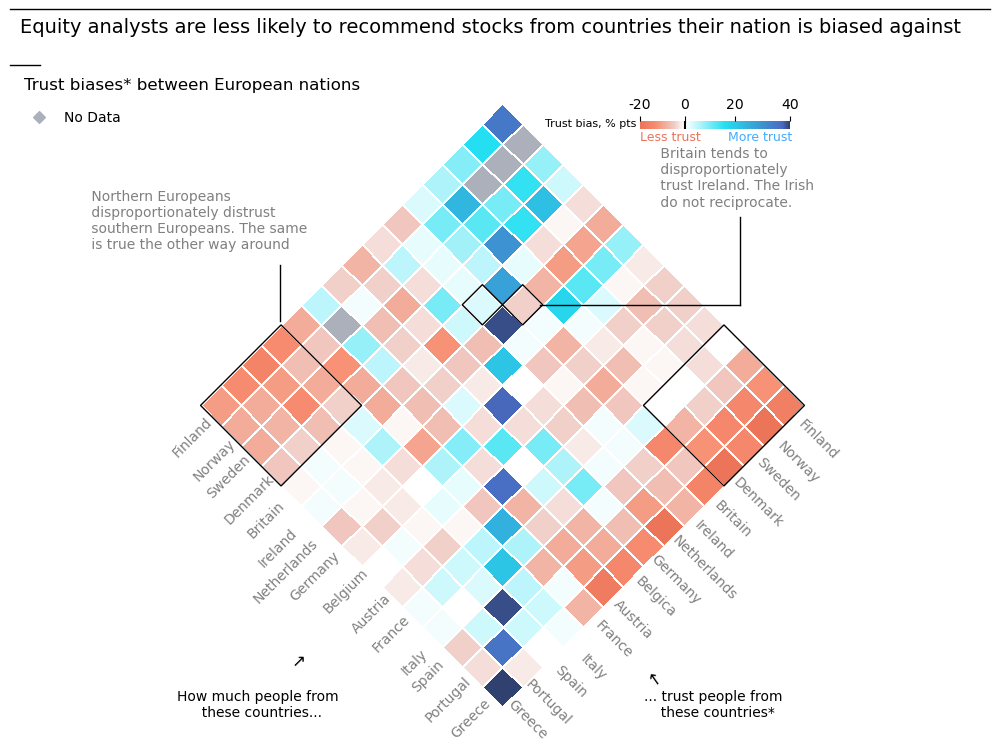

In [165]:
# Creación de figura y axis con eje rotado
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax0 = rotate_axes(fig, 111, 45)
# Heatmap
heatmap = sns.heatmap(df_reordenado,
                      annot=False,
                      mask=mask,
                      cmap=my_gradient,
                      ax=ax0,
                      linecolor='white',
                      linewidths=0.5,
                      cbar_kws={'orientation': 'horizontal'})
ax.set_axis_off()
# Titulo y subtitulo
fig.suptitle("Equity analysts are less likely to recommend stocks from countries their nation is biased against", color='black', fontsize=14)
ax.set_title("Trust biases* between European nations", fontsize=12)
ax.title.set_position([0.1, 1])
# Leyendas
plt.scatter([], [], color=(0.675, 0.690, 0.733), label='No Data', marker='D')
plt.legend(bbox_to_anchor=(-0.1, 1), frameon=False)
plt.text(13.7, 9.9, 'Trust bias, % pts',
         horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
# Barra de color
cbar = heatmap.collections[0].colorbar
cbar.ax.set_position([0.65, 0.55, 0.15, 0.3])  # Ajuste de posición y tamaño para que quede horizontal
cbar.set_ticks([cbar.vmin, 0, 20, cbar.vmax])
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.set_ticklabels(['-20', '0', '20', '40'])
cbar.ax.axvline(0.05, color='black', linestyle='-')
cbar.ax.text(0.2, -1.1, 'Less trust', ha='center', va='center', transform=cbar.ax.transAxes, color=(0.922, 0.455, 0.349), fontsize=9)
cbar.ax.text(0.8, -1.1, 'More trust', ha='center', va='center', transform=cbar.ax.transAxes, color=(0.259, 0.675, 1.000), fontsize=9)
# Ajustar los recuadros
rect = plt.Rectangle((0, 0), 4, 4, linewidth=1, edgecolor='black', facecolor='none', transform=ax0.transData)
rect_2 = plt.Rectangle((11, 11), 4, 4, linewidth=1, edgecolor='black', facecolor='none', transform=ax0.transData)
rect_3 = plt.Rectangle((9, 4), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax0.transData)
rect_4 = plt.Rectangle((10, 5), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax0.transData)
ax0.add_patch(rect)
ax0.add_patch(rect_2)
ax0.add_patch(rect_3)
ax0.add_patch(rect_4)
# Añadir textos explicativos
plt.text(16, 8, ' Britain tends to\n disproportionately\n trust Ireland. The Irish\n do not reciprocate.', 
         horizontalalignment='left', verticalalignment='center', fontsize=10, color='grey')
plt.text(-4, 6.5, ' Northern Europeans\n disproportionately distrust\n southern Europeans. The same\n is true the other way around', 
         horizontalalignment='left', verticalalignment='center', fontsize=10, color='grey')
plt.text(2, -10.5, 'How much people from\n  these countries...', 
         horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(3.5, -9, '→',
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', rotation=45)
plt.text(18, -10.5, '... trust people from\n  these countries*', 
         horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(16, -9.5, '→',
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', rotation=125)
# Etiquetas de paises
paises = ['Finland', 'Norway', 'Sweden', 'Denmark', 'Britain', 'Ireland', 'Netherlands',
          'Germany', 'Belgium', 'Austria', 'France', 'Italy', 'Spain',
          'Portugal', 'Greece']
x_positions = [-0.3, 0.5, 1, 1.7, 2.3, 2.7, 3, 4, 5.1, 6, 6.7, 7.5, 8, 8.7, 9.5]
y_positions = [-1.1, -1.9, -2.5, -3.3, -4, -5, -5.8, -6, -6.5, -7.3, -8, -9, -9.5, -10.3, -11]
for pais, x, y in zip(paises, x_positions, y_positions):
    plt.text(x, y, pais, 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=10, color='grey', rotation=45)
paises_2 = ['Greece', 'Portugal', 'Spain', 'Italy', 'France', 'Austria', 'Belgica', 
            'Germany', 'Netherlands', 'Ireland', 'Britain', 'Denmark', 'Sweden', 
            'Norway', 'Finland']    
x_positions_2 = [11.5, 12.2, 13, 13.8, 14.5, 15.2, 16, 16.7, 17.7, 18, 18.7, 19.6, 20.3, 21, 21.7]
y_positions_2 = [-11, -10.4, -9.7, -9.2, -8.2, -7.5, -6.7, -6.1, -5.7, -4.7, -4, -3.4, -2.6, -2, -1.2]
for pais, x, y in zip(paises_2, x_positions_2, y_positions_2):
    plt.text(x, y, pais, 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=10, color='grey', rotation=-45)
#Lineas
fig.add_artist(plt.Line2D([0.02, 1], [0.99, 0.99], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.02, 0.05], [0.92, 0.92], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.55, 0.75], [0.62, 0.62], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.29, 0.29], [0.6, 0.67], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.75, 0.75], [0.62, 0.73], color='black', linewidth=1))
# Mostrar grafico
plt.show()

**Visualización N_2**

In [48]:
# Carga del dataframe
try:
    df_happiness = pd.read_csv(r'.\data\02-happiness-economics.csv')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

In [49]:
# Encabezados
df_happiness.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,1298.143187,1.324255e+07,1,2008,rise-fall,True,<25m,1
1,2,Albania,AL,4.634252,8754.565278,2.269081e+06,1,2008,rise-rise,False,<25m,1
2,3,Argentina,AR,6.115706,17643.280656,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
3,4,Armenia,AM,4.607600,6893.071401,2.384185e+06,3,2008,rise-rise,False,<25m,1
4,5,Australia,AU,7.293279,40313.264414,1.670645e+07,3,2008,rise-fall,True,<25m,1


In [50]:
# Descripción estadistica
df_happiness.describe()

,Unnamed: 0,happy,gdp.pc,pop,obs,year,pop.levels
count,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.00000,250.000000
mean,125.500000,5.452395,17979.488308,3.881314e+07,3.108000,2013.00000,1.332000
std,72.312977,1.125600,17590.526322,1.293912e+08,0.957079,5.01003,0.656888
min,1.000000,3.005142,652.056768,2.511490e+05,1.000000,2008.00000,1.000000
25%,63.250000,4.663815,3729.216182,3.883648e+06,3.000000,2008.00000,1.000000
50%,125.500000,5.311014,12239.157128,8.017570e+06,3.000000,2013.00000,1.000000
75%,187.750000,6.213347,27652.936668,2.346547e+07,4.000000,2018.00000,1.000000
max,250.000000,7.941353,96244.356304,1.140639e+09,4.000000,2018.00000,4.000000


In [51]:
# Manejo de variables
# Escala logaritmica para visualización
df_happiness['gdp.pc'] = np.log(df_happiness['gdp.pc'])
# Modificación de nombre
df_happiness['name'] = df_happiness['name'].replace('United Arab Emirates', 'UAE')
# Filtrar el DataFrame para mostrar los países con una población de más de 5 millones de personas en el año 2018
countries_with_pop_over_5m_2018 = df_happiness[(df_happiness['pop'] > 5000000) & (df_happiness['year'] == 2018)]['name'].unique()
filtered_df = df_happiness[df_happiness['name'].isin(countries_with_pop_over_5m_2018)]

In [52]:
# Encabezados
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    int64  
 1   name        170 non-null    object 
 2   iso2c       170 non-null    object 
 3   happy       170 non-null    float64
 4   gdp.pc      170 non-null    float64
 5   pop         170 non-null    float64
 6   obs         170 non-null    int64  
 7   year        170 non-null    int64  
 8   quadrant    170 non-null    object 
 9   paradox     170 non-null    bool   
 10  pop.break   170 non-null    object 
 11  pop.levels  170 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 16.1+ KB


In [53]:
# Descripción estadistica
filtered_df.describe()

,Unnamed: 0,happy,gdp.pc,pop,obs,year,pop.levels
count,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000
mean,126.370588,5.418117,9.150151,5.574971e+07,3.223529,2013.000000,1.488235
std,73.548505,1.102004,1.247295,1.541588e+08,0.833847,5.014771,0.747685
min,1.000000,3.067623,6.541033,3.883987e+06,1.000000,2008.000000,1.000000
25%,59.250000,4.590787,8.041228,7.876587e+06,3.000000,2008.000000,1.000000
50%,125.500000,5.285717,9.410153,1.594438e+07,3.000000,2013.000000,1.000000
75%,183.750000,6.219966,10.214751,4.369942e+07,4.000000,2018.000000,2.000000
max,250.000000,7.515624,11.386073,1.140639e+09,4.000000,2018.000000,4.000000


In [54]:
# Filtrar datos para los años 2008 y 2018
df_2008 = filtered_df[filtered_df['year'] == 2008]
df_2018 = filtered_df[filtered_df['year'] == 2018]

In [55]:
# Descripción estadistica
df_2018.describe()

,Unnamed: 0,happy,gdp.pc,pop,obs,year,pop.levels
count,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.0,85.000000
mean,188.870588,5.443562,9.247475,5.961310e+07,3.788235,2018.0,1.517647
std,38.585338,1.096159,1.217198,1.634811e+08,0.599486,0.0,0.765503
min,126.000000,3.067623,6.541033,5.594583e+06,2.000000,2018.0,1.000000
25%,155.000000,4.676749,8.215490,8.591547e+06,4.000000,2018.0,1.000000
50%,184.000000,5.427583,9.499736,1.645359e+07,4.000000,2018.0,1.000000
75%,223.000000,6.181672,10.235504,4.474566e+07,4.000000,2018.0,2.000000
max,250.000000,7.487322,11.123786,1.140639e+09,4.000000,2018.0,4.000000


In [56]:
# Colores para la visualización
# Paleta de colores para visualización
color_same_direction = (0.0, 0.651, 0.749)  
color_opposite_direction = (0.945, 0.306, 0.196) 
# Definición de color
def get_color(df_2008, df_2018, country):
    gdp_change = df_2018[df_2018['name'] == country]['gdp.pc'].values[0] - df_2008[df_2008['name'] == country]['gdp.pc'].values[0]
    happy_change = df_2018[df_2018['name'] == country]['happy'].values[0] - df_2008[df_2008['name'] == country]['happy'].values[0]
    if (gdp_change > 0 and happy_change > 0) or (gdp_change < 0 and happy_change < 0):
        return color_same_direction  # Misma dirección
    else:
        return color_opposite_direction  # Direcciones opuestas

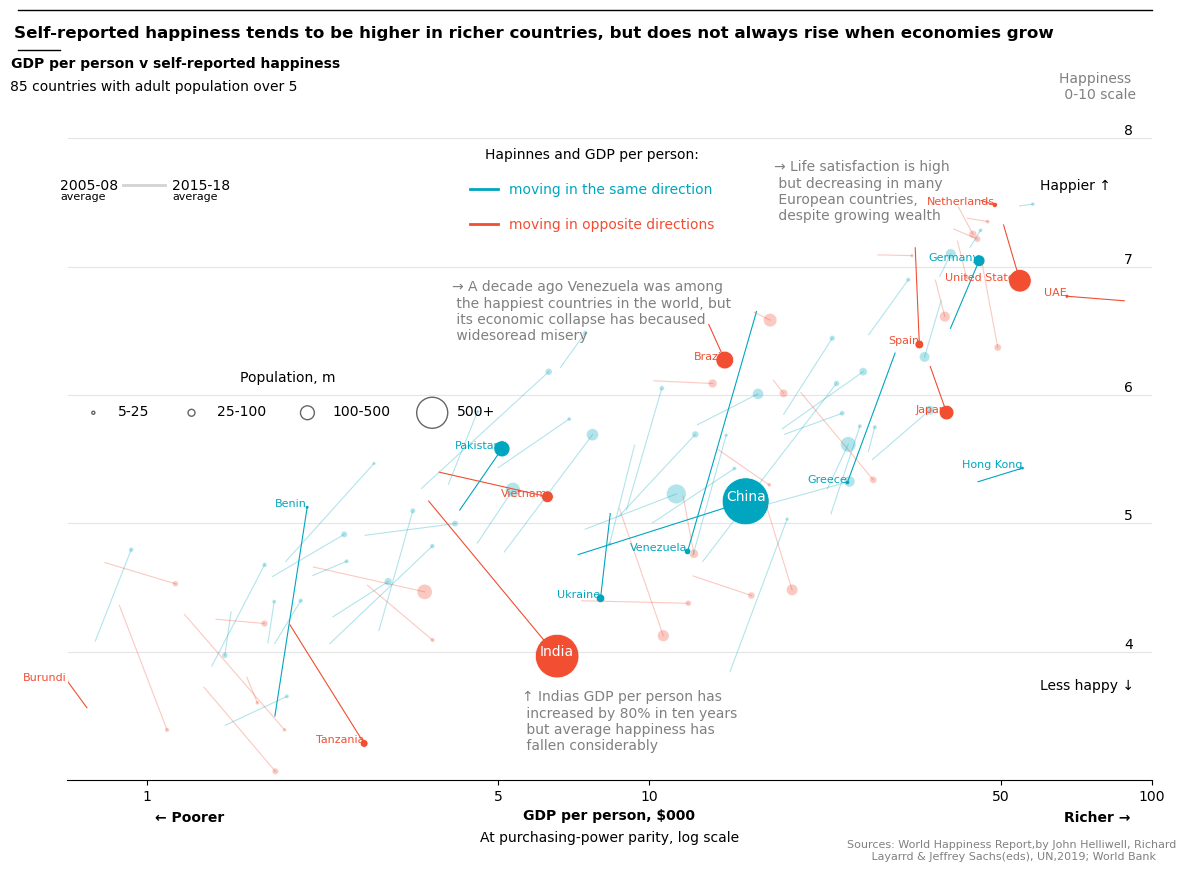

In [164]:
# Creación de figura y axis
fig, ax = plt.subplots(figsize=(14, 10))
# Paises destacados
countries_to_label = ['India', 'Burundi', 'Tanzania', 'Benin', 'India', 'Vietnam', 'Pakistan',
                      'Ukraine', 'China', 'Brazil', 'Venezuela', 'Greece', 'Hong Kong', 
                      'Japan', 'Spain', 'Germany', 'Netherlands', 'United States', 'UAE']
# Definición de tipo de gráfico
scatter = ax.scatter(
    df_2018['gdp.pc'], 
    df_2018['happy'], 
    s=df_2018['pop'] / 1e6,
    c=[get_color(df_2008, df_2018, country) for country in df_2018['name']],  
    alpha=[1.0 if country in countries_to_label else 0.3 for country in df_2018['name']],
    edgecolors="w", 
    linewidth=0.5)
# Generación de linea para periodo anterior
for country in df_2018['name'].unique():
    if country in df_2008['name'].values:
        gdp_2008 = df_2008[df_2008['name'] == country]['gdp.pc'].values[0]
        happy_2008 = df_2008[df_2008['name'] == country]['happy'].values[0]
        gdp_2018 = df_2018[df_2018['name'] == country]['gdp.pc'].values[0]
        happy_2018 = df_2018[df_2018['name'] == country]['happy'].values[0]
        color = get_color(df_2008, df_2018, country)
        alpha_value = 1.0 if country in countries_to_label else 0.3
        ax.plot(
            [gdp_2008, gdp_2018], 
            [happy_2008, happy_2018], 
            color=color, 
            linestyle='-', 
            linewidth=0.8,
            alpha=alpha_value)
# Título, subtítulo, texto referencial
ax.text(0.43, 0.97, "Self-reported happiness tends to be higher in richer countries, but does not always rise when economies grow",
        ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black',fontweight='bold')
ax.text(0.1, 0.93, "GDP per person v self-reported happiness",
        ha='center', va='center', transform=ax.transAxes, fontsize=10, color='black',fontweight='bold')
ax.text(0.08, 0.90, "85 countries with adult population over 5",
        ha='center', va='center', transform=ax.transAxes, fontsize=10, color='black')
# Ejes
# Eje Y: titulo, limites, ticks y anotaciones
ax.set_ylabel('Happiness \n 0-10 scale', rotation=0, labelpad=20,color='gray')
ax.yaxis.set_label_coords(0.95, 0.92) 
ax.set_ylim(3, 9)
ax.set_yticks([4, 5, 6, 7, 8])
fig.text(0.82, 0.70, 
         'Happier ↑', 
         ha='left', fontsize=10, color='black',)
fig.text(0.82, 0.20, 
         'Less happy ↓', 
         ha='left', fontsize=10, color='black')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='y', direction='in', length=6, width=1.5, colors='black', pad=-20, zorder=5)
ax.tick_params(axis='y', which='major', length=0)
for tick in ax.get_yticklabels():
    tick.set_verticalalignment('bottom')
# Eje X: titulo, limites, ticks y anotaciones
ax.set_xlabel('GDP per person, $000', fontweight='bold')
x_min = 6.541033
x_max = 11.123786
ax.set_xlim(x_min, x_max)
values = [1000, 5000, 10000, 50000, 100000]
positions = np.log(values)
ax.set_xticks(positions)
ax.set_xticklabels(['1', '5', '10', '50', '100'])  
ax.annotate('← Poorer', xy=(0.1, -0.055), xycoords='axes fraction', fontsize=10,
            xytext=(-15, -0), textcoords='offset points', fontweight='bold')
ax.annotate('Richer →', xy=(0.9, -0.055), xycoords='axes fraction', fontsize=10,
            xytext=(15, 0), textcoords='offset points', fontweight='bold')
ax.tick_params(axis='x', which='major', labelcolor='black', color='black')
# Grilla
ax.grid(alpha=0.2, color='grey', zorder=0)
ax.xaxis.grid(False)
# Leyendas
# Primera leyenda
legend_labels = ['5-25', '25-100', '100-500', '500+']
legend_sizes = [5e6, 25e6, 100e6, 500e6]

for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], edgecolors='k', facecolors='none', alpha=0.6, s=size / 1e6, label=label)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1.5, title='Population, m', ncol=4, loc='center left')
# Segunda Leyenda
legend_ax2 = fig.add_axes([0.45, 0.65, 0.1, 0.1], frameon=False)
legend_colors = [color_same_direction, color_opposite_direction]
legend_labels = ['moving in the same direction', 'moving in opposite directions']
for color, label in zip(legend_colors, legend_labels):
    legend_ax2.plot([], [], color=color, linewidth=2, label=label)
    legend_ax2.scatter([], [], c=[color], edgecolors="w", linewidth=0.5)
legend2 = legend_ax2.legend(scatterpoints=1, frameon=False, labelspacing=1.5, title='Hapinnes and GDP per person:', loc='center')
legend_ax2.axis('off')
for text, color in zip(legend2.get_texts(), legend_colors):
    text.set_color(color) 
# Etiquetas del grafico
for i, row in df_2018.iterrows():
    if row['name'] in countries_to_label:
        if row['name'] in ['India', 'China']:
            ax.text(
                row['gdp.pc'], 
                row['happy'], 
                row['name'], 
                fontsize=10, 
                ha='center', 
                va='baseline', 
                color="white", 
                fontweight='light'
            )
        else:
            color = get_color(df_2008, df_2018, row['name'])
            ax.text(
                row['gdp.pc'], 
                row['happy'], 
                row['name'],  
                fontsize=8, 
                ha='right', 
                va='baseline', 
                color=color, 
                fontweight='light'
            ) 
#Textos informativos
fig.text(0.8, 0.03, 'Sources: World Happiness Report,by John Helliwell, Richard\n Layarrd & Jeffrey Sachs(eds), UN,2019; World Bank', ha='center', fontsize=8, color='gray')
x_label_position = ax.xaxis.label.get_position()
ax.text(x_label_position[0], x_label_position[1] - 0.08,'At purchasing-power parity, log scale', 
        ha='center', fontsize=10, color='black', transform=ax.transAxes)
fig.text(0.12, 0.7, '2005-08', 
         ha='left', fontsize=10, color='black')
fig.text(0.20, 0.7, '2015-18', 
         ha='left', fontsize=10, color='black')
fig.text(0.12, 0.69, 'average', 
         ha='left', fontsize=8, color='black')
fig.text(0.20, 0.69, 'average', 
         ha='left', fontsize=8, color='black')
fig.text(0.45, 0.14,'↑ Indias GDP per person has\n increased by 80% in ten years\n but average happiness has\n fallen considerably', fontsize=10, color='grey')
fig.text(0.63, 0.67,'→ Life satisfaction is high\n but decreasing in many\n European countries,\n despite growing wealth', fontsize=10, color='grey')
fig.text(0.40, 0.55,'→ A decade ago Venezuela was among\n the happiest countries in the world, but\n its economic collapse has becaused\n widesoread misery', fontsize=10, color='grey')
#  Spine
ax.spines['left'].set_edgecolor('white') 
ax.spines['right'].set_edgecolor('white') 
ax.spines['top'].set_edgecolor('white') 
#Lineas
fig.add_artist(plt.Line2D([0.09, 0.9], [0.88, 0.88], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.09, 0.12], [0.84, 0.84], color='black', linewidth=1))
fig.add_artist(plt.Line2D([0.165, 0.195], [0.705, 0.705], color='lightgrey', linewidth=2))
# Mostrar grafico
plt.show()